In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
print (type(df["bathrooms"].values))
list2 = list()
print(4.5 % 1)
for i in df["bathrooms"].values:
    x = 0
    if (4.5%1 >= 0.5):
        x = int(i) + 1
        list2.append(x)
    if (4.5%1 < 0.5):
        x = int(i) + 1
        list2.append(x)
df["bathrooms"].replace(list2, inplace=True)
df.head()

<class 'numpy.ndarray'>
0.5


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,2.25,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,2.25,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.25,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.drop('date' , axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,2.25,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,2.25,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.25,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df = df.astype({"bathrooms": int, "floors": int})

In [9]:
df.drop(['date','id','yr_renovated','sqft_basement'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,2,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,2,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [1]:
hi = df[['bedrooms', 'price']].groupby('bedrooms', as_index=False).mean()
y = t
sns.barplot(x=hi["bedrooms"], y=hi["price"])

#polynomial

NameError: name 'df' is not defined

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

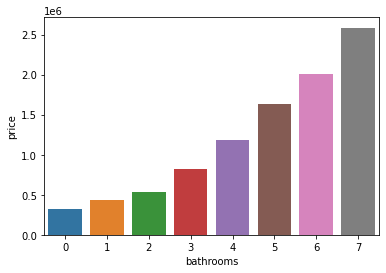

In [12]:
hi = df[['bathrooms','price']].groupby('bathrooms', as_index =False).mean()
sns.barplot(x = hi['bathrooms'], y=hi['price'])

#linear

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

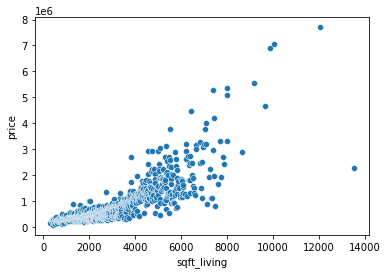

In [13]:
hi = df[['sqft_living','price']].groupby('sqft_living', as_index =False).mean()
sns.scatterplot(x = hi['sqft_living'], y=hi['price'])

# maybe linear ?
#delete the outline !!

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

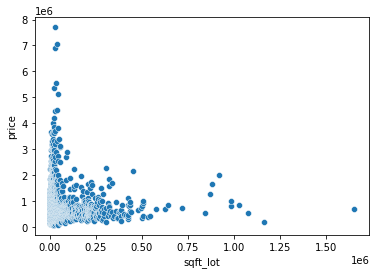

In [14]:
hi = df[['sqft_lot','price']].groupby('sqft_lot', as_index =False).mean()
sns.scatterplot(x = hi['sqft_lot'], y=hi['price'])

# will that's weird

<AxesSubplot:xlabel='floors', ylabel='price'>

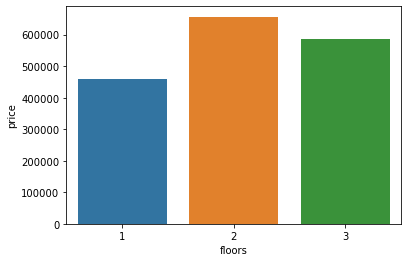

In [15]:
hi = df[['floors','price']].groupby('floors', as_index =False).mean()
sns.barplot(x = hi['floors'], y=hi['price'])

# the second floor for some reason is higher

## the Paragraph! here


In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,2,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,2,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


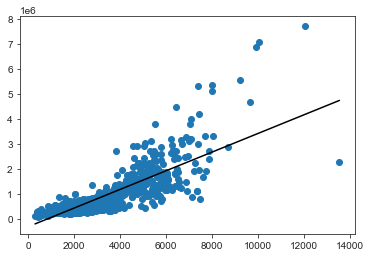

In [49]:
data = df[['sqft_living','price']].groupby('sqft_living', as_index =False).mean()
x = data['sqft_living'].values[:,np.newaxis]
y = data['price']

xtrain,xtest,ytrain,yteast =train_test_split(x,y,test_size = 0.2,random_state = 40)

model = LinearRegression() # building the model
model.fit(xtrain,ytrain) # fitting the model to our train data

predicted = model.predict(x_test) # testing our model with the xtest



#plotting the regression
plt.scatter(x,y)
plt.plot(x,model.predict(x),color="k")


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

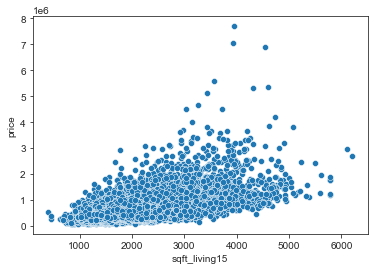

In [62]:
sns.scatterplot ( x = df.sqft_living15 , y = df.price )

In [66]:
x = df[['sqft_living','sqft_living15']]
y = df.price

model = LinearRegression()
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3 , random_state = 40)
model.fit(xtrain,ytrain)
predict = model.predict(xtest)





#in this model it predicts the price based in 2 parameters ... price vectors depends on 2 variables 
# while in the first model , it predicts the price based on only one parameter... price vector depend on 1 variable

## KNOW the DIFFERENCE !

MSE 108629090461.9121
R squared 0.13592726560320811


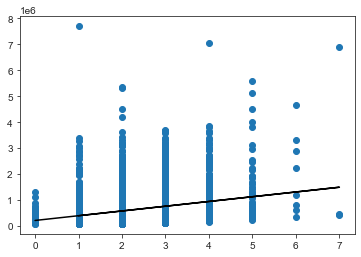

In [69]:
x=df["bathrooms"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
plt.scatter(x,y)
plt.plot(x,model.predict(x),color="k")

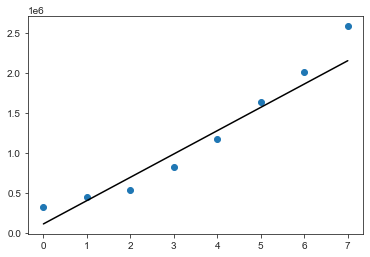

In [70]:
hi = df[['bathrooms','price']].groupby('bathrooms', as_index =False).mean()

x = hi['bathrooms'].values[:,np.newaxis]
y = hi['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20, random_state = 40)

model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color="k")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

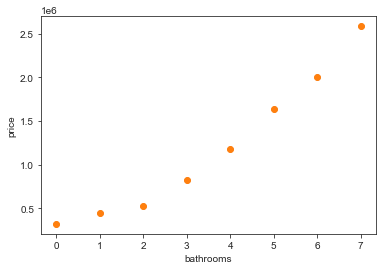

In [75]:
hi = df[['bathrooms','price']].groupby('bathrooms', as_index =False).mean()
sns.scatterplot(x = hi['bathrooms'], y=hi['price'])



x = hi['bathrooms'].values[:,np.newaxis]
y = hi['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

#the same as above, but this is polynomial



# plt.scatter(x,y)
# plt.plot(x,lg.predict(x),color="k")
#know how to plot those!

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

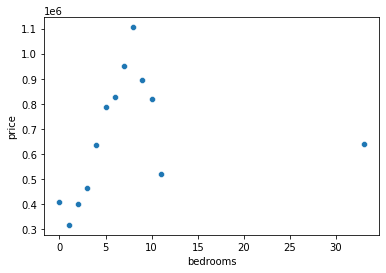

In [19]:
hi = df[['bedrooms', 'price']].groupby('bedrooms', as_index=False).mean()
sns.scatterplot(x=hi["bedrooms"], y=hi["price"])

x = hi['bathrooms'].values[:,np.newaxis]
y = hi['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

#bedrooms and price as a polynomial model

